This Jupyter Notebook is used for exploring the problem of creating Sankey diagram of changes for a specific user in specific repo.

In [91]:
import json
from collections import Counter
from pathlib import Path

# data analysis
import numpy as np
import pandas as pd

# plotting
import holoviews as hv

Note that after importing HoloViews as `hv` we need to run `hv.extension()` to load the appropriate plotting extension, allowing us to generate visualizations.

Even though we can happily create, analyze, and manipulate HoloViews objects without using any plotting backend, the `hv.extension()` command is normally executed just after importing HoloViews so that objects can have a rich graphical representation rather than the very-limited textual representation.

The supported HoloViews backends include ‘bokeh’, ‘matplotlib’, and ‘plotly’; the first extension given as parameter to `hv.extension()` will be the default extension.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
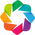

In [105]:
# no need for interactivity when examining Sankey diagrams, so 'matplotlib' would be enough
# but the code copied from `02-contributors_graph.ipynb` assumes 'bokeh' backend
hv.extension('bokeh')

# currently using 'matplotlib' creates the following problem:
# ValueError: Unexpected option 'width' for Sankey type across all extensions. Similar options for current extension ('matplotlib') are: ['cbar_width', 'node_width'].

# Sankey - directory structure of changes

Possible engines:
- Mermaid.js: <https://mermaid.js.org/syntax/sankey.html>
- Plotly (go.Sankey)
- HoloViews (hv.Sankey)
- ...

In [2]:
%pwd

'/home/jnareb/python-diff-annotator/notebooks/panel'

In [3]:
%ls ../../data/examples/stats/

git.lines-stats.json
git.lines-stats.purpose-to-type.json
git.purpose-counter.json
git.purpose-per-file.json
git.timeline.json
git.timeline.purpose-to-type.json
hellogitworld.lines-stats.json
hellogitworld.lines-stats.purpose-to-type.json
hellogitworld.purpose-counter.json
hellogitworld.purpose-per-file.json
hellogitworld.timeline.json
hellogitworld.timeline.purpose-to-type.json
linux.lines-stats.json
linux.lines-stats.purpose-to-type.json
linux.purpose-counter.json
linux.purpose-per-file.json
linux.timeline.json
linux.timeline.purpose-to-type.json
qtile.lines-stats.json
qtile.lines-stats.purpose-to-type.json
qtile.purpose-counter.json
qtile.purpose-per-file.json
qtile.timeline.json
qtile.timeline.purpose-to-type.json
tensorflow.lines-stats.json
tensorflow.lines-stats.purpose-to-type.json
tensorflow.purpose-counter.json
tensorflow.purpose-per-file.json
tensorflow.timeline.json
tensorflow.timeline.purpose-to-type.json


## Read and process data

### lines-stats data

In [20]:
with open('../../data/examples/stats/qtile.lines-stats.purpose-to-type.json', mode='r') as json_fp:
    lines_data = json.load(json_fp)

The data read from lines-stats file is, perhaps unnecessarily, nested

In [8]:
len(lines_data)

1

In [7]:
lines_data.keys()

dict_keys(['data/examples/annotations/qtile'])

Extract data from the only key

In [11]:
len(lines_data[next(iter(lines_data))].keys())

1

In [10]:
lines_data[next(iter(lines_data))].keys()

dict_keys(['all_authors-no_merges'])

In [12]:
key_1 = next(iter(lines_data))
key_1

'data/examples/annotations/qtile'

In [14]:
key_1_1 = next(iter(lines_data[key_1]))
key_1_1

'all_authors-no_merges'

In [21]:
lines_data_extracted = lines_data[key_1][key_1_1]
len(lines_data_extracted)

5350

Examine example data

In [22]:
next(iter(lines_data_extracted))

'47474a8375ae785b91992355be1678565eba9d23.v2.json'

In [23]:
lines_data_extracted[next(iter(lines_data_extracted))]

{'libqtile/layout/tree.py': {'language': 'Python',
  'type': 'programming',
  'purpose': 'programming',
  '+': {'count': 34,
   'type.code': 30,
   'purpose.programming': 34,
   'type.documentation': 4},
  '-': {'count': 4, 'type.code': 4, 'purpose.programming': 4},
  '+/-': {'type.code': 34,
   'purpose.programming': 38,
   'type.documentation': 4}}}

### timelines data

In [24]:
with open('../../data/examples/stats/qtile.timeline.purpose-to-type.json', mode='r') as json_fp:
    timeline_data = json.load(json_fp)

In [25]:
len(timeline_data)

1

In [26]:
timeline_data.keys()

dict_keys(['qtile'])

In [28]:
timeline_list = timeline_data[next(iter(timeline_data))]
len(timeline_list)

5350

Examine example data

In [29]:
timeline_list[0]

{'bug_id': 'all_authors-no_merges',
 'patch_id': '47474a8375ae785b91992355be1678565eba9d23.v2.json',
 'file_names': 1,
 'language:Python': 1,
 'type:programming': 1,
 'purpose:programming': 1,
 '+:count': 34,
 '+:type.code': 30,
 '+:purpose.programming': 34,
 '+:type.documentation': 4,
 '-:count': 4,
 '-:type.code': 4,
 '-:purpose.programming': 4,
 'diff.n_files': 1,
 'diff.hunk_span_src': 296,
 'diff.hunk_span_dst': 326,
 'diff.n_hunks': 3,
 'diff.n_lines_added': 34,
 'diff.n_lines_removed': 4,
 'diff.n_lines_all': 56,
 'diff.n_rem': 3,
 'diff.n_mod': 1,
 'diff.n_groups': 3,
 'diff.patch_size': 37,
 'diff.n_add': 33,
 'diff.hunk_spread_src': 277,
 'diff.hunk_spread_dst': 277,
 'diff.groups_spread': 287,
 'author.timestamp': 1302557067,
 'author.tz_info': '+0300',
 'author.name': 'Paul Colomiets',
 'author.email': 'pc@gafol.net',
 'committer.timestamp': 1302557067,
 'committer.tz_info': '+0300',
 'committer.name': 'Paul Colomiets',
 'committer.email': 'pc@gafol.net',
 'n_parents': 1}

### Extract user

In [30]:
timeline_df = pd.DataFrame.from_records(timeline_list)
timeline_df.head()

,bug_id,patch_id,file_names,language:Python,type:programming,purpose:programming,+:count,+:type.code,+:purpose.programming,+:type.documentation,...,-:purpose.markup,language:HTML,language:Markdown,language:JSON,language:TOML,language:Git Revision List,language:SVG,language:desktop,language:CSS,language:Nix
0,all_authors-no_merges,47474a8375ae785b91992355be1678565eba9d23.v2.json,1.0,1.0,1.0,1.0,34.0,30.0,34.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,all_authors-no_merges,88197e8de01d79af7858d60acb9bd57bc06b5e73.v2.json,1.0,1.0,1.0,1.0,4.0,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,all_authors-no_merges,9f411bf9bcf74c7e28d7eaa0d1fd03c382458ba4.v2.json,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,all_authors-no_merges,98e4006c0df309ed9f4523fd1e17f4f32be75933.v2.json,1.0,1.0,1.0,1.0,5.0,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,all_authors-no_merges,87d315f46af779e0fe1049cb88ed0469a2f54c80.v2.json,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
timeline_df.describe()

,file_names,language:Python,type:programming,purpose:programming,+:count,+:type.code,+:purpose.programming,+:type.documentation,-:count,-:type.code,...,-:purpose.markup,language:HTML,language:Markdown,language:JSON,language:TOML,language:Git Revision List,language:SVG,language:desktop,language:CSS,language:Nix
count,5348.000000,4552.000000,4585.000000,4259.000000,5123.000000,4046.000000,4074.000000,2549.000000,4463.000000,3544.000000,...,62.000000,49.000000,13.0,2.0,16.0,2.0,3.0,8.000000,13.000000,1.0
mean,2.757479,2.567443,2.563577,2.217422,37.812415,25.946614,30.651448,12.916046,24.680260,18.419865,...,32.032258,3.224490,1.0,1.0,1.0,1.0,1.0,1.125000,1.461538,2.0
std,6.475666,6.541037,6.530231,5.136801,164.936831,117.498059,129.032081,49.445949,159.044182,113.016117,...,93.611679,3.274048,0.0,0.0,0.0,0.0,0.0,0.353553,0.967418,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,2.0
25%,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,2.0
50%,1.000000,1.000000,1.000000,1.000000,9.000000,7.000000,7.000000,3.000000,4.000000,4.000000,...,3.500000,2.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,2.0
75%,3.000000,2.000000,2.000000,2.000000,29.000000,20.000000,23.000000,9.000000,14.000000,12.000000,...,20.000000,4.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,2.0
max,238.000000,234.000000,234.000000,138.000000,8189.000000,5652.000000,5829.000000,1629.000000,8083.000000,5742.000000,...,663.000000,14.000000,1.0,1.0,1.0,1.0,1.0,2.000000,4.000000,2.0


In [34]:
timeline_df.columns

Index(['bug_id', 'patch_id', 'file_names', 'language:Python',
       'type:programming', 'purpose:programming', '+:count', '+:type.code',
       '+:purpose.programming', '+:type.documentation', '-:count',
       '-:type.code', '-:purpose.programming', 'diff.n_files',
       'diff.hunk_span_src', 'diff.hunk_span_dst', 'diff.n_hunks',
       'diff.n_lines_added', 'diff.n_lines_removed', 'diff.n_lines_all',
       'diff.n_rem', 'diff.n_mod', 'diff.n_groups', 'diff.patch_size',
       'diff.n_add', 'diff.hunk_spread_src', 'diff.hunk_spread_dst',
       'diff.groups_spread', 'author.timestamp', 'author.tz_info',
       'author.name', 'author.email', 'committer.timestamp',
       'committer.tz_info', 'committer.name', 'committer.email', 'n_parents',
       '-:type.documentation', 'diff.spread_inner', 'purpose:test',
       '+:type.test', '+:purpose.test', '-:type.test', '-:purpose.test',
       'language:Text', 'type:prose', 'purpose:documentation',
       '+:purpose.documentation', 'languag

In [37]:
timeline_df[timeline_df['author.email'] == 'tycho@tycho.ws'].head()

,bug_id,patch_id,file_names,language:Python,type:programming,purpose:programming,+:count,+:type.code,+:purpose.programming,+:type.documentation,...,-:purpose.markup,language:HTML,language:Markdown,language:JSON,language:TOML,language:Git Revision List,language:SVG,language:desktop,language:CSS,language:Nix
11,all_authors-no_merges,58e7cdcba4e59252f8a5d588486320f9ceee331b.v2.json,4.0,4.0,4.0,4.0,33.0,26.0,33.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,all_authors-no_merges,12f133991f914de6c76fd0e76b59ab0d8377f98e.v2.json,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,all_authors-no_merges,e1e9b2397c5c1ef48fb40aa46fa9e265632172a4.v2.json,6.0,5.0,5.0,5.0,137.0,106.0,115.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,all_authors-no_merges,890d38bcd960222111f4c68b5d066ab57c425acf.v2.json,2.0,NaN,NaN,NaN,7.0,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,all_authors-no_merges,e9904f07a3dbe7beedeee090320b3d6e846ab8b7.v2.json,1.0,1.0,1.0,1.0,7.0,7.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
timeline_df[timeline_df['author.email'] == 'tycho@tycho.ws']['patch_id']

11      58e7cdcba4e59252f8a5d588486320f9ceee331b.v2.json
16      12f133991f914de6c76fd0e76b59ab0d8377f98e.v2.json
25      e1e9b2397c5c1ef48fb40aa46fa9e265632172a4.v2.json
27      890d38bcd960222111f4c68b5d066ab57c425acf.v2.json
37      e9904f07a3dbe7beedeee090320b3d6e846ab8b7.v2.json
                              ...                       
5322    86af2bcf019f3f4ae5c964804399e53277077cf4.v2.json
5332    6023948738ec0791aeb5b1a19c58e601ef79ed30.v2.json
5333    96f988713c76f8c021b92ed50048cdd468d0dfef.v2.json
5337    d9657eb042cba2a2e85cb5fb3ee0d441f91c6184.v2.json
5347    ee494ce7e2caa9b46865617a5e68733145288daf.v2.json
Name: patch_id, Length: 543, dtype: object

In [41]:
author_patch_ids_set = set(timeline_df[timeline_df['author.email'] == 'tycho@tycho.ws']['patch_id'].tolist())
len(author_patch_ids_set)

543

In [42]:
timeline_user_df = timeline_df[timeline_df['patch_id'].isin(author_patch_ids_set)]
timeline_user_df[['bug_id', 'patch_id', 'file_names','author.timestamp', 'author.tz_info',
       'author.name', 'author.email', 'committer.timestamp',
       'committer.tz_info', 'committer.name', 'committer.email', 'n_parents']].head()

,bug_id,patch_id,file_names,author.timestamp,author.tz_info,author.name,author.email,committer.timestamp,committer.tz_info,committer.name,committer.email,n_parents
11,all_authors-no_merges,58e7cdcba4e59252f8a5d588486320f9ceee331b.v2.json,4.0,1.409584e+09,-0500,Tycho Andersen,tycho@tycho.ws,1.410368e+09,-0500,Sean Vig,sean.v.775@gmail.com,1.0
16,all_authors-no_merges,12f133991f914de6c76fd0e76b59ab0d8377f98e.v2.json,1.0,1.424923e+09,-0700,Tycho Andersen,tycho@tycho.ws,1.424923e+09,-0700,Tycho Andersen,tycho@tycho.ws,1.0
25,all_authors-no_merges,e1e9b2397c5c1ef48fb40aa46fa9e265632172a4.v2.json,6.0,1.355105e+09,-0600,Tycho Andersen,tycho@tycho.ws,1.355504e+09,-0600,Tycho Andersen,tycho@tycho.ws,1.0
27,all_authors-no_merges,890d38bcd960222111f4c68b5d066ab57c425acf.v2.json,2.0,1.352753e+09,-0600,Tycho Andersen,tycho@tycho.ws,1.352753e+09,-0600,Tycho Andersen,tycho@tycho.ws,1.0
37,all_authors-no_merges,e9904f07a3dbe7beedeee090320b3d6e846ab8b7.v2.json,1.0,1.358118e+09,-0600,Tycho Andersen,tycho@tycho.ws,1.358118e+09,-0600,Tycho Andersen,tycho@tycho.ws,1.0


Select subset of all lines-stats data

In [44]:
lines_data_extracted_user = {
    key: val
    for key, val in lines_data_extracted.items()
    if key in author_patch_ids_set
}
print(f"{len(author_patch_ids_set)=}, {len(lines_data_extracted_user)=}")

len(author_patch_ids_set)=543, len(lines_data_extracted_user)=543


## Create data for Sankey diagram

In [47]:
lines_data_extracted_user[next(iter(lines_data_extracted_user))]

{'libqtile/drawer.py': {'language': 'Python',
  'type': 'programming',
  'purpose': 'programming',
  '+': {},
  '-': {'count': 14,
   'type.code': 11,
   'purpose.programming': 14,
   'type.documentation': 3},
  '+/-': {'type.code': 11,
   'purpose.programming': 14,
   'type.documentation': 3}},
 'libqtile/manager.py': {'language': 'Python',
  'type': 'programming',
  'purpose': 'programming',
  '+': {'count': 30,
   'type.documentation': 7,
   'purpose.programming': 30,
   'type.code': 23},
  '-': {'count': 14,
   'type.code': 12,
   'purpose.programming': 14,
   'type.documentation': 2},
  '+/-': {'type.documentation': 9,
   'purpose.programming': 44,
   'type.code': 35}},
 'libqtile/widget/base.py': {'language': 'Python',
  'type': 'programming',
  'purpose': 'programming',
  '+': {'count': 2, 'type.code': 2, 'purpose.programming': 2},
  '-': {'count': 2, 'type.code': 2, 'purpose.programming': 2},
  '+/-': {'type.code': 4, 'purpose.programming': 4}},
 'libqtile/widget/google_calenda

### Extract (path, type, count) triples/Counter

In [54]:
def commit_line_stats_to_triple(commit_data: dict) -> list[tuple[str, str, int]]:
    return  [
        (path, line_type, val) 
        for path, data in commit_data.items()
        for line_type, val in data['+/-'].items()
        if line_type.startswith('type.')
    ]

In [55]:
lines_data_example_commit = lines_data_extracted_user[next(iter(lines_data_extracted_user))]
len(lines_data_example_commit)

4

In [56]:
example_commit_triple_path = commit_line_stats_to_triple(lines_data_example_commit)
example_commit_triple_path

[('libqtile/drawer.py', 'type.code', 11),
 ('libqtile/drawer.py', 'type.documentation', 3),
 ('libqtile/manager.py', 'type.documentation', 9),
 ('libqtile/manager.py', 'type.code', 35),
 ('libqtile/widget/base.py', 'type.code', 4),
 ('libqtile/widget/google_calendar.py', 'type.code', 2)]

In [51]:
def line_stats_to_triple(data: dict) -> list[tuple[str, str, int]]:
    result = []
    for patch_id, commit_data in data.items():
        result.extend(commit_line_stats_to_triple(commit_data))

    return result

In [57]:
user_triple_path = line_stats_to_triple(lines_data_extracted_user)
len(user_triple_path)

1438

In [62]:
user_triple_path[:4]

[('libqtile/drawer.py', 'type.code', 11),
 ('libqtile/drawer.py', 'type.documentation', 3),
 ('libqtile/manager.py', 'type.documentation', 9),
 ('libqtile/manager.py', 'type.code', 35)]

In [60]:
user_triple_path[-4:]

[('libqtile/widget/__init__.py', 'type.code', 1),
 ('Makefile', 'type.project', 2),
 ('libqtile/manager.py', 'type.code', 4),
 ('libqtile/window.py', 'type.code', 2)]

In [72]:
def line_stats_to_counter(data: dict) -> Counter:
    result = Counter()
    for commit_data in data.values():
        for triple in commit_line_stats_to_triple(commit_data):
            result[triple[0:2]] += triple[2]

    return result

In [66]:
user_triple_path[0][0:2]

('libqtile/drawer.py', 'type.code')

In [67]:
user_triple_path[0][2]

11

In [73]:
user_counter_path = line_stats_to_counter(lines_data_extracted_user)
len(user_counter_path)

331

In [74]:
def triples_from_counter(data_counter: Counter) -> list[tuple[str, str, int]]:
    return [(p[0], p[1], v) for p, v in data_counter.items()]

In [77]:
user_triple_path_compact = triples_from_counter(user_counter_path)
user_triple_path_compact[:5]

[('libqtile/drawer.py', 'type.code', 54),
 ('libqtile/drawer.py', 'type.documentation', 35),
 ('libqtile/manager.py', 'type.documentation', 240),
 ('libqtile/manager.py', 'type.code', 1173),
 ('libqtile/widget/base.py', 'type.code', 228)]

In [78]:
user_triple_path[:5]

[('libqtile/drawer.py', 'type.code', 11),
 ('libqtile/drawer.py', 'type.documentation', 3),
 ('libqtile/manager.py', 'type.documentation', 9),
 ('libqtile/manager.py', 'type.code', 35),
 ('libqtile/widget/base.py', 'type.code', 4)]

In [79]:
def counter_from_triples(data_list: list[tuple[str, str, int]]) -> Counter:
    return Counter({(p_f, p_t): v for p_f, p_t, v in data_list})

In [81]:
counter_from_triples(user_triple_path_compact) == user_counter_path

True

### Split path into components

**TODO:** mark `type.*` values in a special way, so that they can be reliably distiguished from pathnames, even if there is for example `type.code` file in top directory of the project.

In [82]:
def tuples_split_dirs_counter(data_list: list[tuple[str, str, int]]) -> Counter:
    dir_data = Counter()
    
    for p,_,v in data_list:
        #print(f"{p} => {v}")
        dir_data[(str(Path(p).parent), p)] += v
        for p_f, p_t in zip(Path(p).parent.parents, Path(p).parents):
            #print(f"- ({p_f}, {p_t})")
            dir_data[(str(p_f), str(p_t))] += v

    return dir_data

In [110]:
user_counter_split_path = user_counter_path | tuples_split_dirs_counter(user_triple_path_compact)
len(user_counter_split_path)

595

In [111]:
len(user_triple_path)

1438

In [112]:
len(user_triple_path_compact)

331

In [113]:
triples_from_counter(user_counter_split_path)[:6]

[('libqtile/drawer.py', 'type.code', 54),
 ('libqtile/drawer.py', 'type.documentation', 35),
 ('libqtile/manager.py', 'type.documentation', 240),
 ('libqtile/manager.py', 'type.code', 1173),
 ('libqtile/widget/base.py', 'type.code', 228),
 ('libqtile/widget/google_calendar.py', 'type.code', 190)]

In [114]:
[(f,t,v) for f,t,v in triples_from_counter(user_counter_split_path) if f == '.'][:5]

[('.', 'libqtile', 11881),
 ('.', '.travis.yml', 30),
 ('.', 'docs', 2663),
 ('.', 'debian', 920),
 ('.', 'test', 1463)]

In [115]:
[(f,t,v) for f,t,v in triples_from_counter(user_counter_split_path) if t.startswith('type.')][:5]

[('libqtile/drawer.py', 'type.code', 54),
 ('libqtile/drawer.py', 'type.documentation', 35),
 ('libqtile/manager.py', 'type.documentation', 240),
 ('libqtile/manager.py', 'type.code', 1173),
 ('libqtile/widget/base.py', 'type.code', 228)]

In [116]:
[(f,t,v) for f,t,v in triples_from_counter(user_counter_split_path) if t.endswith('.py')][:5]

[('libqtile', 'libqtile/drawer.py', 89),
 ('libqtile', 'libqtile/manager.py', 1413),
 ('libqtile/widget', 'libqtile/widget/base.py', 298),
 ('libqtile/widget', 'libqtile/widget/google_calendar.py', 310),
 ('docs', 'docs/conf.py', 49)]

In [92]:
def hv_sankey_plot_from_triples(sankey_data: list[tuple[str, str, int]], width: int = 800, height: int = 400) -> hv.Sankey:
    return hv.Sankey(sankey_data).opts(edge_color_index=1, width=width, height=height)

In [117]:
user_triple_split_path = triples_from_counter(user_counter_split_path)
len(user_triple_split_path)

595

In [118]:
# Check the current backend
current_backend = hv.Store.current_backend
print(f"The current HoloViews backend is: {current_backend}")

The current HoloViews backend is: bokeh


Trying to plot for all _files_ leads to unreadable mess (even with smaller number of contributions than in this case)

In [119]:
hv_sankey_plot_from_triples(user_triple_split_path)

:Sankey   [start,end]   (Value)

### Consider only directories

Instead of displaying full information about changed lines in changed files, we can consider changes **in aggregate**.

Let's take a look only at directories in which changed files are, and transfer ownership of changed lines from individual files (like for example `libqtile/widget/base.py`), to a containing directory (in the case of this example: `libqtile/widget/`, denoting all files in this directory as `libqtile/widget/*`)

In [133]:
def counter_file_to_containing_dir(data_counter: Counter) -> Counter:
    result = Counter()
    replace = {}

    # find replacements
    for n_pair, value in data_counter.items():
        (n_from, n_to) = n_pair

        # NOTE: bit fragile, but should work
        if n_to.startswith('type.'):
            replace[n_from] = f"{Path(n_from).parent}/*"

    # replace in both n_from and n_to
    for n_pair, value in data_counter.items():
        (n_from, n_to) = n_pair
        n_from = replace.get(n_from, n_from)
        n_to   = replace.get(n_to,   n_to)

        result[(n_from, n_to)] += value

    return result

In [126]:
len(user_counter_split_path)

595

In [134]:
user_counter_split_path_dironly = counter_file_to_containing_dir(user_counter_split_path)
len(user_counter_split_path_dironly)

123

In [135]:
user_triple_split_path_dironly = triples_from_counter(user_counter_split_path_dironly)
len(user_triple_split_path_dironly)

123

In [136]:
user_triple_split_path_dironly[:6]

[('libqtile/*', 'type.code', 4283),
 ('libqtile/*', 'type.documentation', 1032),
 ('libqtile/widget/*', 'type.code', 3299),
 ('./*', 'type.data', 67),
 ('docs/*', 'type.code', 49),
 ('docs/*', 'type.documentation', 491)]

In [137]:
[(f,t,v) for f,t,v in user_triple_split_path_dironly if t.endswith('.py')][:6]

[]

In [138]:
[(f,t,v) for f,t,v in user_triple_split_path_dironly if f.endswith('.py')][:6]

[]

It is still too much information to display (in many cases), but it is not unreadable mess

In [139]:
hv_sankey_plot_from_triples(user_triple_split_path_dironly)

:Sankey   [start,end]   (Value)